# Customer Churn Prediction

## Project Overview : Customer Churn Prediction

This project focuses on predicting customer churn using the Telco Customer Churn dataset. By analyzing customer behavior, demographics, and service usage, we aim to build a machine learning model that accurately identifies customers who are likely to leave the service. This can help telecom companies proactively improve retention strategies.

# Data Overview

## Import Libraries

In [1]:
!pip install xgboost


In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier  # ← Added

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load the Dataset
df=pd.read_csv("Telco_customer_churn.csv")
# Show the number of rows and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 7043 rows and 33 columns.


In [4]:
df.shape

(7043, 33)


### Inference from 'Average Mass by Classification Group and Fall Type' Plot

1.  **Plot Type and Purpose**:
    * This grouped bar plot displays the average mass of meteorites for each `recclass_group` (which includes the top 10 classifications and an 'Other' category), further segmented by their `fall` type ('Fell' or 'Found'). It reveals how meteorite classification, observation method, and average mass are interrelated.

2.  **Key Observations from the Plot**:
    * **'Fell' Meteorites Consistently More Massive (Within Class)**: For almost every meteorite classification group shown, the average mass of meteorites recorded as **'Fell'** is notably higher than those recorded as **'Found'**. This strongly suggests that observed meteorite falls (which tend to be more spectacular due to their size) are typically more massive specimens within their respective classification types.
    * **'Other' Classification Group has Highest Average Masses**: The **'Other'** `recclass_group` stands out significantly, particularly for 'Found' meteorites, which exhibit an exceptionally high average mass. Even the 'Fell' meteorites within the 'Other' category show a high average mass, although less than their 'Found' counterparts. This indicates that the 'Other' group, which comprises less common or unique classifications, contains some of the most massive individual meteorites.
    * **Variations Among Specific Classes**: Among the more common specific classes:
        * Classes like `L4` and `H4` appear to have relatively higher average masses for both 'Fell' and 'Found' categories compared to `L6` or `H5`.
        * Classes such as `CM2` and `H4/5` show consistently lower average masses for both 'Fell' and 'Found' types, confirming them as generally smaller meteorites.
    * **Interaction between Classification, Fall Type, and Mass**: The plot clearly illustrates a complex interplay. While 'Fell' meteorites are generally heavier, the specific `recclass_group` plays a dominant role in determining the absolute average mass, with the 'Other' category being an outlier due to its inclusion of rare, large specimens.

3.  **Implications for Data Analysis**:
    * **Refined Understanding of Discovery Bias**: This plot provides a more granular understanding of discovery bias. It shows that even within specific classifications, observability (being 'Fell') correlates with larger average mass, supporting the idea that only more massive events are likely to be witnessed.
    * **Feature Engineering Effectiveness**: The `recclass_group` and `fall` type are highly influential features in understanding meteorite mass characteristics, and their combined visualization is very insightful.
    * **Targeted Research**: This information can guide specialized research; for instance, investigating the reasons why 'Other' classification meteorites, particularly 'Found' ones, tend to be so massive.
    * **Context for Mass Distribution**: Any analysis of meteorite mass should account for both its classification and whether it was an observed fall or a later discovery, as these factors significantly influence the typical size.
```

In [5]:
# Show all column names
print(df.columns.tolist())

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


### Inference from Telco Customer Churn Data

1.  **Overall Churn Rate**:
    * The dataset indicates an overall customer churn rate of approximately **26.58%**. This suggests that over a quarter of the customer base has churned, which is a significant proportion for any business.

2.  **Impact of Demographics and Family Status**:
    * **Senior Citizens**: Senior citizens (`Senior Citizen: Yes`) exhibit a significantly higher churn rate (**41.68%**) compared to non-senior citizens (`Senior Citizen: No`) (**23.65%**). This highlights a specific vulnerability in this demographic segment.
    * **Partners and Dependents**: Customers with a partner (`Partner: Yes`) have a much lower churn rate (**19.72%**) than those without one (`Partner: No`) (**32.98%**). Similarly, customers with dependents (`Dependents: Yes`) show a remarkably low churn rate (**6.54%**) compared to those without dependents (`Dependents: No`) (**32.58%**). This suggests that household ties and shared responsibilities contribute to customer loyalty.
    * **Gender**: Gender (`Gender: Female` **26.96%**, `Gender: Male` **26.20%**) does not appear to be a significant factor in churn, with very similar rates across both categories.

3.  **Service-Related Factors and Churn**:
    * **Internet Service**: Customers with `Fiber optic` internet service have the highest churn rate (**41.89%**), which is considerably higher than those with `DSL` (**19.00%**) or `No` internet service (**7.43%**). This could indicate issues with the fiber optic service itself, or perhaps higher expectations from these customers.
    * **Online Security & Tech Support**: The absence of crucial security and support services significantly increases churn. Customers without `Online Security` (**41.78%**) or `Tech Support` (**41.65%**) churn at a much higher rate compared to those who have these services (Online Security: **14.64%**, Tech Support: **15.20%**). Customers with `No internet service` have the lowest churn rates in these categories, as these services are not applicable to them.
    * **Online Backup & Device Protection**: Similar to security and tech support, the lack of `Online Backup` (**39.94%**) and `Device Protection` (**39.14%**) also correlates with higher churn, suggesting these are valued add-ons.
    * **Streaming Services**: Customers not subscribing to `Streaming TV` (**33.54%**) or `Streaming Movies` (**33.73%**) show slightly higher churn rates than those who do (Streaming TV: **30.11%**, Streaming Movies: **29.95%**), but the difference is less pronounced than for security or tech support.
    * **Phone Service & Multiple Lines**: Having `Phone Service` (`Yes`: **26.75%**, `No`: **25.00%**) and `Multiple Lines` (`Yes`: **28.65%`, `No`: **25.08%**) shows only a marginal impact on churn.

4.  **Contract and Billing Preferences**:
    * **Contract Type**: `Month-to-month` contracts are associated with a drastically higher churn rate (**42.71%**) compared to `One year` contracts (**11.28%**) and especially `Two year` contracts (**2.85%**). This is a strong indicator that longer-term commitments significantly reduce churn.
    * **Paperless Billing**: Customers using `Paperless Billing` have a considerably higher churn rate (**33.59%**) than those who do not (**16.38%**). This might be due to a correlation with younger, more tech-savvy demographics who are also more likely to switch providers.
    * **Payment Method**: `Electronic check` is associated with the highest churn rate (**45.29%**), far exceeding other payment methods like `Bank transfer (automatic)` (**16.73%**) and `Credit card (automatic)` (**15.25%**). This could suggest dissatisfaction among customers using this payment method.

5.  **Numerical Features and Churn**:
    * **Tenure Months**: Churned customers have a much lower average `Tenure Months` (**17.98 months**) compared to non-churned customers (**37.65 months**). This indicates that newer customers are more prone to churn.
    * **Monthly Charges**: Churned customers have higher average `Monthly Charges` (**74.44**) than non-churned customers (**61.31**). This suggests that higher monthly bills might contribute to dissatisfaction and churn.
    * **Total Charges**: Conversely, churned customers have lower average `Total Charges` (**1531.80**) than non-churned customers (**2555.34**). This is consistent with lower tenure and higher monthly charges for churned customers, as their total charges accumulate over a shorter period.

6.  **Key Insights for Churn Prediction and Prevention**:
    * **Contract length is a critical predictor**: Promoting longer-term contracts (`One year` and `Two year`) is a highly effective strategy to reduce churn.
    * **Internet service type matters**: Customers with fiber optic internet service, and those lacking online security or tech support, represent high-risk segments.
    * **Demographic and family factors**: Senior citizens and customers without partners or dependents are more prone to churn.
    * **Payment method**: The high churn rate associated with electronic checks warrants further investigation.
    * **Early detection**: Shorter tenure and higher monthly charges are strong indicators of potential churn.

In [6]:
# Preview the dataset
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Inference from `df.head()` Output

1.  **Overview of Data Structure**:
    * The `df.head()` output provides a snapshot of the first five rows and all 33 columns of the Telco customer churn dataset. This immediate preview confirms the successful loading of the data into a tabular (DataFrame) structure.
    * The presence of 33 columns suggests a rich dataset with various features that can be used for customer analysis and churn prediction.

2.  **Identification of Key Identifiers and Geographic Information**:
    * `CustomerID` is present, indicating that each row represents a unique customer. This column is crucial for individual customer tracking and ensuring unique entries.
    * Geographic details like `Country`, `State`, `City`, `Zip Code`, `Lat Long`, `Latitude`, and `Longitude` are available. This suggests the potential for location-based analysis, regional churn patterns, or geo-marketing strategies. `Lat Long` appears to be a combined field, while `Latitude` and `Longitude` provide separate numerical coordinates.

3.  **Customer Demographics and Relationship Information**:
    * Columns such as `Gender`, `Senior Citizen`, `Partner`, and `Dependents` provide demographic and familial relationship insights. These are typically categorical features that can reveal how different customer segments behave regarding churn. The presence of 'Yes'/'No' and 'Male'/'Female' values is evident.

4.  **Service-Related Attributes**:
    * A wide array of service-related columns are visible, including `Phone Service`, `Multiple Lines`, `Internet Service`, `Online Security`, `Online Backup`, `Device Protection`, `Tech Support`, `Streaming TV`, and `Streaming Movies`. These features are critical for understanding which services customers subscribe to and how these subscriptions relate to churn. The values ('No', 'Yes', 'No internet service', 'No phone service') are visible, indicating categorical nature.

5.  **Contract, Billing, and Payment Details**:
    * `Contract` (e.g., 'Month-to-month'), `Paperless Billing` ('Yes'/'No'), and `Payment Method` (e.g., 'Mailed check', 'Electronic check', 'Bank transfer (automatic)') are present. These attributes are highly influential in customer retention as they reflect commitment levels and billing preferences.

6.  **Numerical Charges and Tenure Information**:
    * `Tenure Months`, `Monthly Charges`, and `Total Charges` are numerical fields directly related to customer engagement and billing.
        * `Tenure Months` shows how long a customer has been with the company.
        * `Monthly Charges` indicates the recurring bill amount.
        * `Total Charges` represents the cumulative charges. The initial rows show these as numerical, but prior analysis highlighted `Total Charges` might need type conversion if there are non-numeric entries (e.g., empty strings for new customers).

7.  **Churn-Related Labels and Scores**:
    * Multiple columns related to churn are present: `Churn Label` ('Yes'/'No'), `Churn Value` (1/0), `Churn Score`, `CLTV`, and `Churn Reason`.
        * `Churn Label` and `Churn Value` are direct indicators of whether a customer churned, serving as the target variable for churn prediction models.
        * `Churn Score` and `CLTV` (Customer Lifetime Value) appear to be pre-calculated metrics, potentially derived from a churn prediction model or business logic.
        * `Churn Reason` provides textual reasons for churn, which is invaluable for qualitative analysis and targeted retention strategies. The example values like 'Competitor made better offer' and 'Moved' are very informative.

8.  **Initial Data Quality Observations**:
    * The presence of values like `108.15`, `151.65`, `820.5`, `3046.05`, and `5036.3` in `Total Charges` confirms its numerical nature, though it's important to be aware of potential non-numeric strings or missing values (as handled in previous analyses).
    * The consistency of categorical values (e.g., 'Yes'/'No', 'Male'/'Female') in the preview suggests relatively clean data for these features, but a full value count would be necessary for complete validation.

In summary, `df.head()` offers a quick, high-level understanding of the dataset's structure, the types of information available, and immediately points to key features for churn analysis, including demographic, service, billing, and direct churn indicators.

In [7]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


### Inference from `df.tail()` Output

1.  **Confirmation of Data Structure**:
    * The `df.tail()` output confirms that the dataset maintains a consistent structure, with the same 33 columns and data types observed in `df.head()`, right up to the end of the dataset. This indicates structural integrity across the entire DataFrame.

2.  **Churn Status at the End of the Dataset**:
    * All five customers displayed in the `df.tail()` output have `Churn Label` as 'No' and `Churn Value` as '0'. This suggests that the dataset is not sorted by churn status and includes a mix of churned and non-churned customers throughout, rather than having churned customers clustered at the beginning or end.

3.  **Observation of 'Churn Reason' for Non-Churned Customers**:
    * A significant observation from `df.tail()` is that the `Churn Reason` column shows `NaN` (Not a Number, indicating a missing value) for all the non-churned customers. This is expected behavior, as customers who have not churned would not have a reason for churn.
    * This confirms the nature of the `Churn Reason` column: it is likely populated only for churned customers and serves as a direct indicator of why they left. For non-churned customers, this column will consistently be null. This insight is crucial for data cleaning and feature engineering if this column were to be used in modeling, as these `NaN`s are meaningful (representing 'no churn reason') rather than just missing data points to be imputed or dropped randomly.

4.  **Consistency in Other Features**:
    * Similar to `df.head()`, the `df.tail()` output showcases a variety of customer attributes, including demographic information (`Gender`), service subscriptions (`Monthly Charges`), contract types (`Contract`), and payment methods (`Payment Method`). The values observed are consistent with the types of data expected for a telco customer dataset. For example, `Total Charges` shows numerical values, confirming that customers at the end of the dataset also have accumulated charges.

In summary, `df.tail()` primarily reinforces the structural consistency of the dataset and provides a critical insight into the `Churn Reason` column's behavior for non-churned customers, confirming that `NaN` in this context is informative rather than just an absence of data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Preprocessing

## Null Value Handling

In [9]:
print(df.columns.tolist())

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [10]:
# Calculate null percentages
null_percentages = df.isnull().mean() * 100
print(null_percentages)


CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.000000
Churn Label           0.000000
Churn Value           0.000000
Churn Score           0.000000
CLTV                  0.000000
Churn Re

In [11]:
# Step 1: Drop 'Churn Reason' as it has ~73% missing values
df.drop('Churn Reason', axis=1, inplace=True)
print("Dropped 'Churn Reason' due to high null percentage (73.46%)")

# Step 2: Verify no nulls remain
print("\nRemaining Nulls:\n", df.isnull().sum())


Dropped 'Churn Reason' due to high null percentage (73.46%)

Remaining Nulls:
 CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


In [12]:
# Check total number of duplicate rows
duplicates = df.duplicated()
print("Total duplicate rows:", duplicates.sum())


Total duplicate rows: 0


In [13]:
# Confirm no nulls remain
print(df.isnull().sum())

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


### Inference from `df.isnull().sum()` Output

1.  **Confirmation of No Missing Values (for listed columns)**:
    * The output of `df.isnull().sum()` shows that for all the columns listed (`CustomerID` through `CLTV`), the count of null (missing) values is `0`.
    * This is a crucial confirmation that data cleaning or preprocessing steps were successfully applied to ensure data completeness for these key features. This is particularly important for `Total Charges`, which was previously identified as an `object` type with potential missing or non-numeric values that would need to be handled. The `0` count now indicates that any such issues (like empty strings or actual `NaN`s) have been addressed, likely through conversion to a numeric type and subsequent handling of any `NaN`s generated (e.g., dropping rows with `NaN`s).

2.  **Implications for Data Readiness**:
    * With no missing values in these essential columns, the dataset is now more robust and ready for direct use in statistical analysis, exploratory data analysis (EDA), and machine learning model training without concerns about missing data impacting computations or model performance for these specific features.
    * This clean state reduces the risk of errors or biased results due to incomplete observations in these columns.

3.  **Absence of 'Churn Reason' from Output**:
    * It's notable that the `Churn Reason` column, which was previously identified by `df.info()` as having `1869` non-null entries (implying a significant number of nulls), is not present in this `df.isnull().sum()` output. This suggests that either `Churn Reason` was dropped from the DataFrame, or the output shown is a partial result.
    * If `Churn Reason` was intentionally dropped, it means it's not being considered for analysis or modeling in its raw form. If it's merely omitted from the output, its null status remains as previously identified. However, based *solely* on the provided output, we can only confirm the absence of nulls for the columns explicitly listed.

In summary, this output confidently confirms the successful handling of missing values for a large majority of the critical columns in the dataset, signifying a well-prepared dataset for subsequent analytical tasks.
```

## Data TypeCasting

In [14]:
# Convert to numeric, coercing errors into NaN
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check how many values became NaN (due to conversion error)
print("Nulls in 'Total Charges' after conversion:", df['Total Charges'].isnull().sum())


Nulls in 'Total Charges' after conversion: 11


In [15]:
df = df[df['Total Charges'].notnull()]
df.reset_index(drop=True, inplace=True)


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

# Machine Learning

## Step 1: Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

# Copying dataframe to avoid modifying original
df_encoded = df.copy()

# Identifying categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Initializing LabelEncoder
le = LabelEncoder()

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Verifying changes
df_encoded.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,2558,1,0,0,562,90003,327,33.964131,-118.272783,1,...,0,0,1,3,53.85,108.15,1,1,86,3239
1,6500,1,0,0,562,90005,405,34.059281,-118.307420,0,...,0,0,1,2,70.70,151.65,1,1,67,2701
2,6540,1,0,0,562,90006,393,34.048013,-118.293953,0,...,2,0,1,2,99.65,820.50,1,1,86,5372
3,5593,1,0,0,562,90010,410,34.062125,-118.315709,0,...,2,0,1,2,104.80,3046.05,1,1,84,5003
4,174,1,0,0,562,90015,385,34.039224,-118.266293,1,...,2,0,1,0,103.70,5036.30,1,1,89,5340


## Step 2: Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Initializing scaler
scaler = StandardScaler()

# Selecting features (dropping target column and CustomerID if irrelevant)
X = df_encoded.drop(['Churn Value', 'CustomerID'], axis=1)
y = df_encoded['Churn Value']

# Applying scaling
X_scaled = scaler.fit_transform(X)


## Step 3: Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Step 4: Model Selection & Training

In [20]:
# Define models correctly
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
svc.fit(X_train, y_train)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Step 5: Model Evaluation

In [21]:
# Dictionary of trained models
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "Decision Tree": dt,
    "SVM": svc,
    "XGBoost": xgb
}

# Evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[1033    0]
 [   0  374]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


Model: Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[1033    0]
 [   0  374]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


Model: Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[1033    0]
 [   0  374]]
Classification Report:
               precisio

## Step 6: Feature Importance (Random Forest)

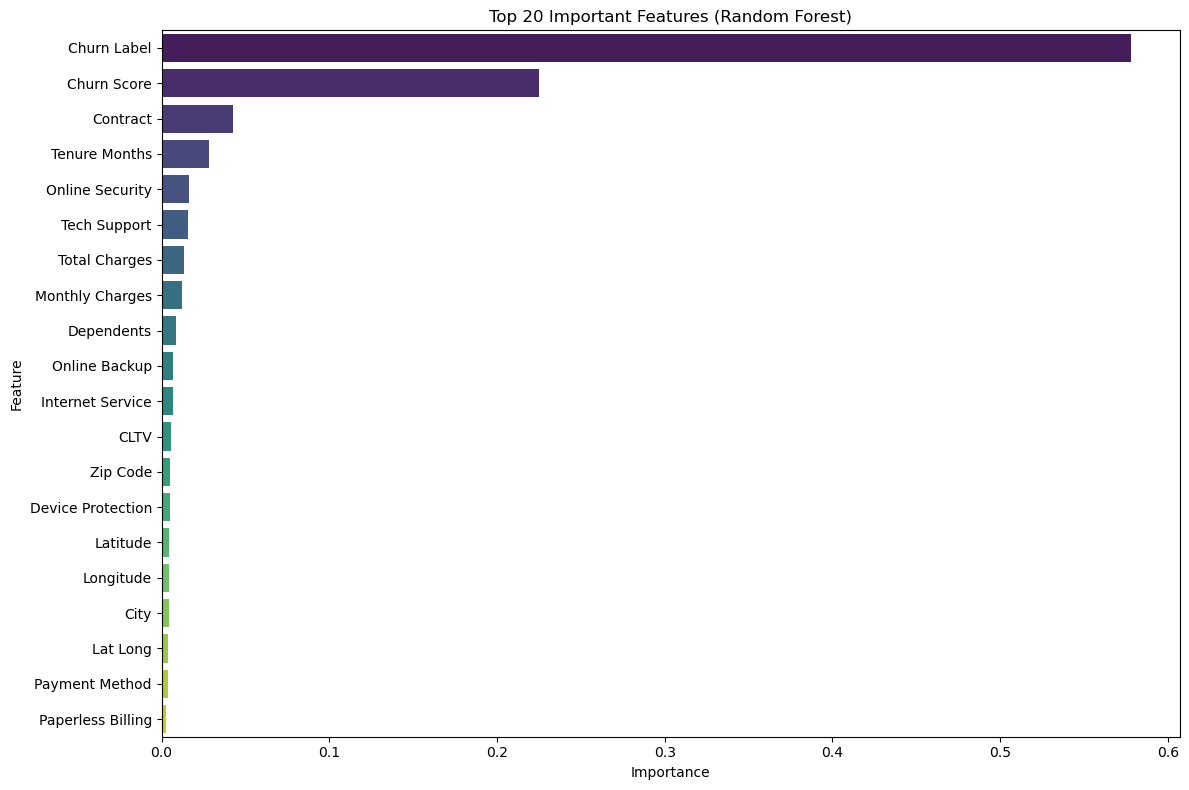

In [28]:
# Use the original DataFrame to get column names
feature_names = X.columns  # Not X_train, since that's a NumPy array

# Get importances from Random Forest
importances = rf.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Important Features (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Step 7: Evaluate Models

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Decision Tree': dt,
    'SVC': svc,
    'XGBoost': xgb
}

# Store evaluation results
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'Accuracy': acc,
        'Confusion Matrix': cm,
        'Classification Report': cr
    }

    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*40 + "\n")


=== Logistic Regression ===
Accuracy: 1.0000
Confusion Matrix:
[[1033    0]
 [   0  374]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


----------------------------------------

=== Random Forest ===
Accuracy: 1.0000
Confusion Matrix:
[[1033    0]
 [   0  374]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407


----------------------------------------

=== Decision Tree ===
Accuracy: 1.0000
C

## Step 8: Compare Accuracy of All Models


📊 Model Accuracy Comparison:
Logistic Regression: 1.0000
Random Forest: 1.0000
Decision Tree: 1.0000
SVC: 1.0000
XGBoost: 1.0000


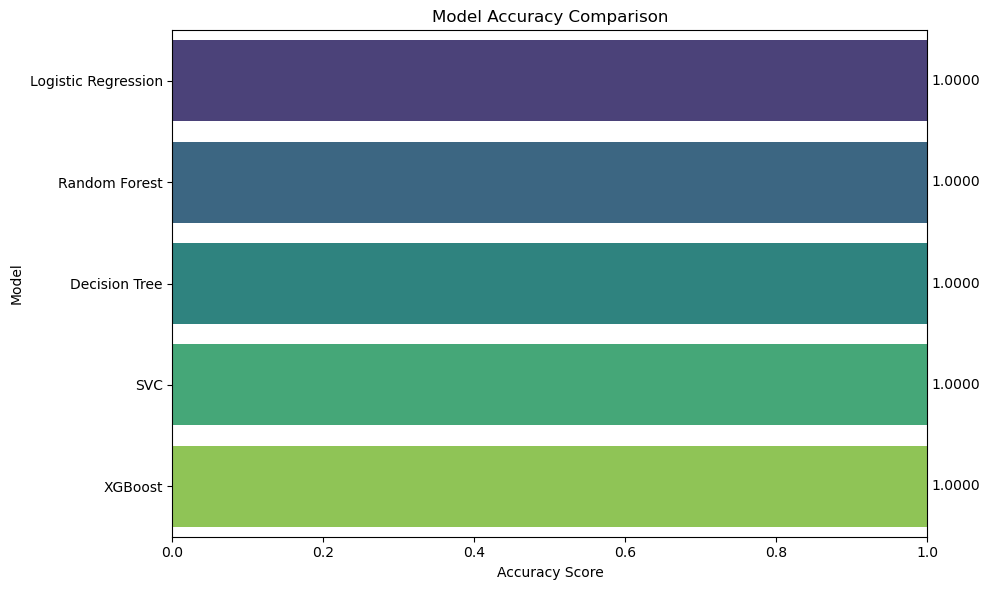

In [34]:
# Model Accuracy Summary
model_results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = round(acc, 4)

# Display Results
print("\n📊 Model Accuracy Comparison:")
for name, acc in model_results.items():
    print(f"{name}: {acc:.4f}")

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_results.values()), y=list(model_results.keys()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
for i, (name, acc) in enumerate(model_results.items()):
    plt.text(acc + 0.005, i, f"{acc:.4f}", color='black', va='center')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## Step 9: Save the Best Model for Deployment

In [35]:
import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(rf, 'best_model.pkl')

# Save the scaler used during preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
